In [9]:
import pandas as pd
from pathlib import Path
import os
from base import *

data_dir =Path('/common/home/vk405/Projects/EnergyLab/Solar-forcast/Data/')
image_dir = Path('/common/users/vk405/EnergyLab/Data')
proc_data_dir = Path('/common/users/vk405/EnergyLab/Data/ProcData')
df = pd.read_csv(f'{data_dir}/tgtimgs.csv')



 

In [5]:
# data_dir = "/common/home/vk405/Projects/EnergyLab/Solar-forcast/Data/"
# image_dir = "/common/users/vk405/EnergyLab/Data/ProcData/"
# seq_length = 10
# tgt = 'csi'
# mode = 'train'

# trn_fdata = JDset(data_dir=data_dir,split=mode,image_dir= image_dir,seq_length=seq_length,tgt=tgt)

In [6]:
def dp(dist_mat):
    """
    Find minimum-cost path through matrix `dist_mat` using dynamic programming.

    The cost of a path is defined as the sum of the matrix entries on that
    path. See the following for details of the algorithm:

    - http://en.wikipedia.org/wiki/Dynamic_time_warping
    - https://www.ee.columbia.edu/~dpwe/resources/matlab/dtw/dp.m

    The notation in the first reference was followed, while Dan Ellis's code
    (second reference) was used to check for correctness. Returns a list of
    path indices and the cost matrix.
    """

    N, M = dist_mat.shape
    
    # Initialize the cost matrix
    cost_mat = np.zeros((N + 1, M + 1))
    for i in range(1, N + 1):
        cost_mat[i, 0] = np.inf
    for i in range(1, M + 1):
        cost_mat[0, i] = np.inf

    # Fill the cost matrix while keeping traceback information
    traceback_mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            penalty = [
                cost_mat[i, j],      # match (0)
                cost_mat[i, j + 1],  # insertion (1)
                cost_mat[i + 1, j]]  # deletion (2)
            i_penalty = np.argmin(penalty)
            cost_mat[i + 1, j + 1] = dist_mat[i, j] + penalty[i_penalty]
            traceback_mat[i, j] = i_penalty

    # Traceback from bottom right
    i = N - 1
    j = M - 1
    path = [(i, j)]
    while i > 0 or j > 0:
        tb_type = traceback_mat[i, j]
        if tb_type == 0:
            # Match
            i = i - 1
            j = j - 1
        elif tb_type == 1:
            # Insertion
            i = i - 1
        elif tb_type == 2:
            # Deletion
            j = j - 1
        path.append((i, j))

    # Strip infinity edges from cost_mat before returning
    cost_mat = cost_mat[1:, 1:]
    return (path[::-1], cost_mat)



def Area(path,N,M):
    #y_path,x_path = zip(*path)
    #x_true,y_true = zip(*zip(range(N+1),range(M+1)))
    points = path
    pos_area = 0
    neg_area = 0
    max_common = (N*M)/2
    for i in range(1,len(points)):
        lst_p = points[i-1]
        p_p = points[i]
        scnd_co_diff = p_p[-1]-lst_p[-1]
        if scnd_co_diff>0:
            base_area = (lst_p[-1]+1) + 0.5
            cur_area = (lst_p[0]+1) + 0.5 if p_p[0]>lst_p[0] else 0.0
            if cur_area>base_area:
                pos_area += abs(cur_area-base_area)
            else:
                neg_area += abs(cur_area-base_area)
    return (pos_area+neg_area)/max_common,pos_area/max_common,neg_area/max_common
                


def getAreas(x,y):
    # Distance matrix
    N = x.shape[0]
    M = y.shape[0]
    dist_mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            dist_mat[i, j] = abs(x[i] - y[j])

    path, cost_mat = dp(dist_mat)
    tdi,pos_t,neg_t = Area(path,N,M)
    return tdi,pos_t,neg_t
    

In [7]:
rawdata = pd.read_csv(os.path.join(data_dir,'rawdata.csv'))
rawdata.head(3)

,DateTime,Date,Imgs,10ma_tgt,GHI,CSI,10ma_tgt_GHI
0,2012-01-01 07:40,2012-01-01,['/common/users/vk405/EnergyLab/Data/20120101/...,1.000000,"[0.014159200000000002, 0.0158264, 0.0154735999...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.021270
1,2012-01-01 07:50,2012-01-01,['/common/users/vk405/EnergyLab/Data/20120101/...,0.579799,"[0.0169704, 0.0179016, 0.018831999999999998, 0...","[0.9440693444197877, 0.8738464414035059, 0.813...",0.033984
2,2012-01-01 08:00,2012-01-01,['/common/users/vk405/EnergyLab/Data/20120101/...,0.489598,"[0.027004000000000004, 0.028263999999999997, 0...","[0.5646406971309266, 0.5512776307119824, 0.539...",0.054753


In [4]:
#sample test-df

tdset = JDset(split='test')

/common/home/vk405/miniconda3/envs/Crossmdl/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
tdset.df.head(2)

,DateTime,Date,Imgs,10ma_tgt,GHI,CSI,10ma_tgt_GHI
72672,2016-01-01 10:10,2016-01-01,['/common/users/vk405/EnergyLab/Data/20160101/...,0.343060,"[0.3273464, 0.32913919999999997, 0.330828, 0.3...","[0.3461501234431341, 0.34575891605487213, 0.34...",0.350612
72673,2016-01-01 10:20,2016-01-01,['/common/users/vk405/EnergyLab/Data/20160101/...,0.340027,"[0.3434736, 0.34520239999999996, 0.3469184, 0....","[0.3427892377976651, 0.34249911744758565, 0.34...",0.365083


1. conv+lstm on GHI

In [23]:
tst_preds = pd.read_csv(data_dir/'joint_csi_tgt_ghi_infered_vals.csv')
tst_preds.head(2)


,Date,DateTime,pred,ground,10ma_tgt_GHI
0,2016-01-01,2016-01-01 10:10,0.443391,0.343060,0.350612
1,2016-01-01,2016-01-01 10:20,0.419984,0.340027,0.365083


In [24]:
import numpy as np
np.sqrt(np.mean(((tst_preds['pred']*1250.0-tst_preds['ground']*1250.0))**2))

363.8855049588503

1. conv+lstm on CSI

In [10]:
#bias
tst_preds = pd.read_csv(data_dir/'joint_csi_infered_vals.csv')


tst_preds['bias'] = tst_preds['pred_ghi'] - tst_preds['true_ghi']

In [11]:
import numpy as np
np.sqrt(np.mean(((tst_preds['pred_ghi']-tst_preds['true_ghi']))**2))

120.39351677191178

<AxesSubplot:ylabel='Frequency'>

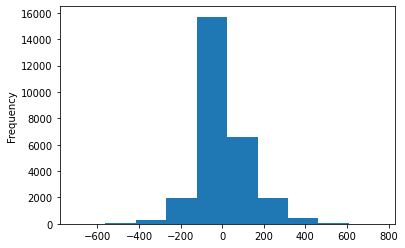

In [12]:
tst_preds['bias'].plot.hist()

In [18]:
tst_preds['bias'].mean(),tst_preds['bias'].std()

(6.917294232768548, 120.19684708617856)

In [13]:

fstq,sndq,thirdq = tst_preds['10ma_tgt'].quantile(0.25),tst_preds['10ma_tgt'].quantile(0.5),tst_preds['10ma_tgt'].quantile(0.75)

first = tst_preds[tst_preds['10ma_tgt']<=fstq]
second  = tst_preds[(tst_preds['10ma_tgt']>fstq) & (tst_preds['10ma_tgt']<=sndq)]
third = tst_preds[(tst_preds['10ma_tgt']>sndq) & (tst_preds['10ma_tgt']<=thirdq)]
fourth = tst_preds[(tst_preds['10ma_tgt']>thirdq)]
first.bias.mean(),second.bias.mean(),third.bias.mean(),fourth.bias.mean()

(132.0738512582659, 5.91276225979754, -42.98329194904913, -67.34164391875258)

In [14]:
sndq

0.25977015118729857

In [20]:
on = 'true_ghi'

fstq,sndq,thirdq = tst_preds[on].quantile(0.25),tst_preds[on].quantile(0.5),tst_preds[on].quantile(0.75)

first = tst_preds[tst_preds[on]<=fstq]
second  = tst_preds[(tst_preds[on]>fstq) & (tst_preds[on]<=sndq)]
third = tst_preds[(tst_preds[on]>sndq) & (tst_preds[on]<=thirdq)]
fourth = tst_preds[(tst_preds[on]>thirdq)]
first.bias.mean(),second.bias.mean(),third.bias.mean(),fourth.bias.mean()

(85.06847736928275, 32.44545186726027, -29.54995413573879, -60.29640970342685)

In [12]:
tst_preds.groupby(['Date']).agg('std').sort_values('ground')

,pred,ground,10ma_tgt,pred_ghi,true_ghi,bias
Date,,,,,,
2017-09-02,0.012646,0.002216,0.002216,196.011458,184.745776,31.855896
2016-06-15,0.010334,0.002805,0.002805,157.449647,169.050880,36.029814
2016-06-18,0.008617,0.002823,0.002823,171.655548,157.872741,30.497616
2016-06-04,0.011529,0.003055,0.003055,166.114865,168.116086,34.714933
2017-06-26,0.008852,0.003090,0.003090,163.887698,162.446797,30.840838
...,...,...,...,...,...,...
2016-12-20,0.054114,0.265658,0.265658,138.348038,201.961180,106.482630
2017-11-26,0.068515,0.267426,0.267426,172.535288,152.804557,62.435938
2016-12-25,0.086122,0.268699,0.268699,79.986319,116.159053,69.581943


In [14]:
tst_preds['bias'].abs().mean()

83.5393037566402

<AxesSubplot:xlabel='DateTime'>

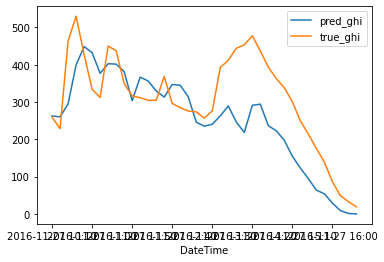

In [14]:
tst_preds[tst_preds['Date'] == '2016-11-27'].plot(x='DateTime',y=['pred_ghi','true_ghi'])

<AxesSubplot:xlabel='DateTime'>

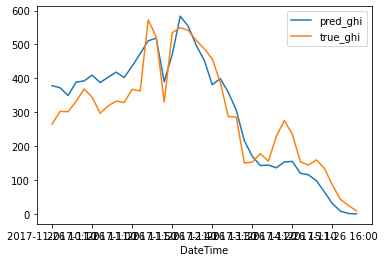

In [15]:
tst_preds[tst_preds['Date'] == '2017-11-26'].plot(x='DateTime',y=['pred_ghi','true_ghi'])


<AxesSubplot:xlabel='DateTime'>

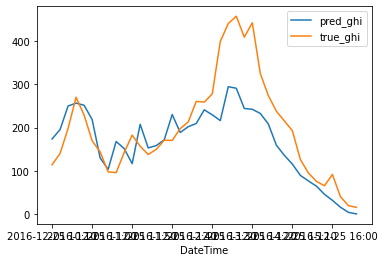

In [17]:
tst_preds[tst_preds['Date'] == '2016-12-25'].plot(x='DateTime',y=['pred_ghi','true_ghi'])


<AxesSubplot:xlabel='DateTime'>

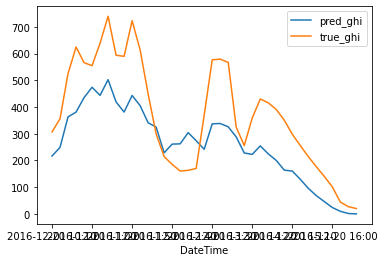

In [18]:
tst_preds[tst_preds['Date'] == '2016-12-20'].plot(x='DateTime',y=['pred_ghi','true_ghi'])


In [ ]:
tst_preds[tst_preds['Date'] == '2016-01-01'].plot(x='DateTime',y=['pred_ghi','true_ghi'])

In [52]:
# x = tst_preds['true_ghi'].iloc[:1000]

# y = tst_preds['pred_ghi'].iloc[:1000]

# d, c, ac, p = dtw.dtw(x, y)
# dist = tam.tam(p)
# print("Distance %f", dist)

Distance %f [363.         363.         636.           1.09009009]


<AxesSubplot:xlabel='DateTime'>

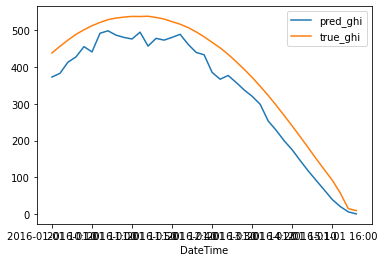

In [53]:
tst_preds[tst_preds['Date'] == '2016-01-01'].plot(x='DateTime',y=['pred_ghi','true_ghi'])

LEAST STD


<AxesSubplot:xlabel='DateTime'>

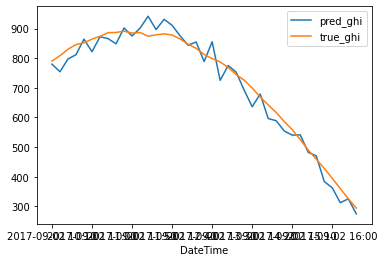

In [19]:
tst_preds[tst_preds['Date'] == '2017-09-02'].plot(x='DateTime',y=['pred_ghi','true_ghi'])

2. conv on CSI

In [4]:
tst_preds = pd.read_csv(data_dir/'infered_vals_csi.csv')
tst_preds.head(2)

,Date,MST,DateTime,pred_tgt,ground_tgt,10ma_tgt,pred_ghi,true_ghi
0,2016-01-01,10:00,2016-01-01 10:00,0.330993,0.368719,0.368719,375.679809,418.4744
1,2016-01-01,10:10,2016-01-01 10:10,0.308397,0.365003,0.365003,370.311986,438.2645


In [5]:
import numpy as np
np.sqrt(np.mean(((tst_preds['pred_ghi']-tst_preds['true_ghi']))**2))

127.34729547903837

<AxesSubplot:ylabel='Frequency'>

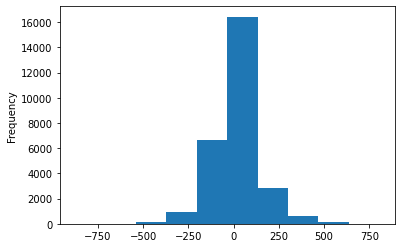

In [6]:
#bias

tst_preds['bias'] = tst_preds['pred_ghi'] - tst_preds['true_ghi']
tst_preds['bias'].plot.hist()

In [8]:
tst_preds['bias'].mean(),tst_preds['bias'].std()

(11.63209324635435, 126.81721320720486)

In [7]:
tst_preds.bias.abs().mean()

83.77535795667096

In [58]:
import tam
import dtw



In [59]:
# x = tst_preds['true_ghi'].iloc[:1000]

# y = tst_preds['pred_ghi'].iloc[:1000]

# d, c, ac, p = dtw.dtw(x, y)
# dist = tam.tam(p)
# print("Distance %f", dist)

Distance %f [306.         306.         693.           0.91891892]


In [64]:

fstq,sndq,thirdq = tst_preds['10ma_tgt'].quantile(0.25),tst_preds['10ma_tgt'].quantile(0.5),tst_preds['10ma_tgt'].quantile(0.75)

first = tst_preds[tst_preds['10ma_tgt']<=fstq]
second  = tst_preds[(tst_preds['10ma_tgt']>fstq) & (tst_preds['10ma_tgt']<=sndq)]
third = tst_preds[(tst_preds['10ma_tgt']>sndq) & (tst_preds['10ma_tgt']<=thirdq)]
fourth = tst_preds[(tst_preds['10ma_tgt']>thirdq)]

In [67]:
first.bias.mean(),second.bias.mean(),third.bias.mean(),fourth.bias.mean()

(131.35189346119398,
 5.465553345415995,
 -30.200023953367698,
 -60.10624604711456)

In [26]:
on = 'true_ghi'

fstq,sndq,thirdq = tst_preds[on].quantile(0.25),tst_preds[on].quantile(0.5),tst_preds[on].quantile(0.75)

first = tst_preds[tst_preds[on]<=fstq]
second  = tst_preds[(tst_preds[on]>fstq) & (tst_preds[on]<=sndq)]
third = tst_preds[(tst_preds[on]>sndq) & (tst_preds[on]<=thirdq)]
fourth = tst_preds[(tst_preds[on]>thirdq)]
first.bias.mean(),second.bias.mean(),third.bias.mean(),fourth.bias.mean()

(89.72629950250217, 34.58751172919388, -23.37694056837685, -54.41971488649936)

In [11]:
tst_preds.groupby(['Date']).agg('std').sort_values('true_ghi')

,pred_tgt,ground_tgt,10ma_tgt,pred_ghi,true_ghi,bias
Date,,,,,,
2017-10-02,0.018542,0.009886,0.009886,75.307878,17.616049,64.224591
2017-01-24,0.033360,0.018081,0.018081,61.063836,21.770720,50.525964
2017-03-11,0.016147,0.018696,0.018696,49.762171,25.816710,40.951232
2017-10-30,0.021671,0.065791,0.065791,84.075176,28.710291,74.032695
2017-02-02,0.024375,0.008588,0.008588,56.907129,28.889159,34.709600
...,...,...,...,...,...,...
2017-07-17,0.102092,0.111410,0.111410,392.643948,411.405246,118.172341
2016-06-13,0.088393,0.121965,0.121965,322.466634,414.644159,223.774306
2017-07-08,0.099116,0.115515,0.115515,387.675414,427.880585,109.934765


<AxesSubplot:xlabel='DateTime'>

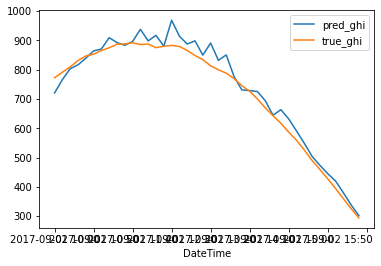

In [12]:
#more std
tst_preds[tst_preds['Date'] == '2017-09-02'].plot(x='DateTime',y=['pred_ghi','true_ghi'])


DYNAMIC TIME WARPING

In [9]:
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance as dist

In [147]:
#bias
tst_preds = pd.read_csv(data_dir/'joint_csi_infered_vals.csv')


tst_preds['bias'] = tst_preds['pred_ghi'] - tst_preds['true_ghi']

In [148]:
true_ghis = tst_preds.groupby('Date')['true_ghi'].apply(np.array)
pred_ghis = tst_preds.groupby('Date')['pred_ghi'].apply(np.array)

In [149]:
len(pred_ghis.iloc[0]),len(true_ghis.iloc[0])

(39, 39)

In [151]:
out = {'tdi':[],'ptdi':[],'ntdi':[]}
from tqdm import tqdm
for i in tqdm(range(len(true_ghis))):
    x = true_ghis.iloc[i]
    y = pred_ghis.iloc[i]
    tdi,pos_t,neg_t = getAreas(x,y)
    out['tdi'].append(tdi)
    out['ptdi'].append(pos_t)
    out['ntdi'].append(neg_t)

100%|██████████| 700/700 [00:06<00:00, 101.18it/s]


In [152]:
np.mean(out['tdi'])

0.3622088234939938

In [153]:
np.mean(out['ptdi'])

0.0273421093851877

In [154]:
np.mean(out['ntdi'])

0.33486671410880603

In [141]:
x = tst_preds[tst_preds['Date'] == '2016-01-01']['true_ghi'].values
y = tst_preds[tst_preds['Date'] == '2016-01-01']['pred_ghi'].values

# Distance matrix
N = x.shape[0]
M = y.shape[0]

dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

path, cost_mat = dp(dist_mat)


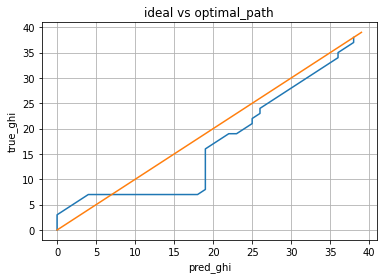

In [142]:
import matplotlib.pyplot as plt
y_path,x_path = zip(*path)
x_true,y_true = zip(*zip(range(N+1),range(M+1)))
plt.title('ideal vs optimal_path')
plt.xlabel('pred_ghi')
plt.ylabel('true_ghi')
plt.plot(y_path, x_path)
plt.plot(y_true,x_true)
plt.grid()


In [143]:
points = path
pos_area = 0
neg_area = 0
max_common = (N*M)/2


points = path
pos_area = 0
neg_area = 0
max_common = (N*M)/2
for i in range(1,len(points)):
    lst_p = points[i-1]
    p_p = points[i]
    scnd_co_diff = p_p[-1]-lst_p[-1]
    if scnd_co_diff>0:
        base_area = (lst_p[-1]+1) + 0.5
        cur_area = (lst_p[0]+1) + 0.5 if p_p[0]>lst_p[0] else 0.0
        if cur_area>base_area:
            pos_area += abs(cur_area-base_area)
        else:
            neg_area += abs(cur_area-base_area)




        

In [144]:
pos_area/max_common

0.06969099276791585

In [145]:
neg_area/max_common

0.3214990138067061

In [146]:
(pos_area+neg_area)/max_common

0.39119000657462194

(-1.9000000000000001, 39.9, -27.55712498492243, 566.5417964278535)

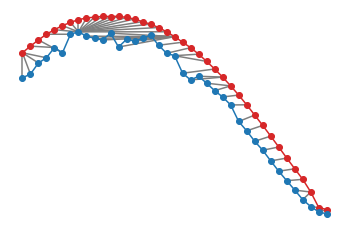

In [94]:
plt.figure()
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c="C7")
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off")

EXAMPLE

(-0.5, 10.5, -2.75, 2.75)

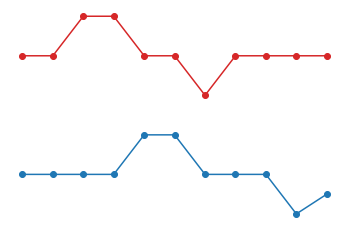

In [129]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([0, 0, 1, 1, 0, 0, -1, 0, 0, 0, 0])
y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 0, -1, -0.5])

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off")

In [130]:
# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

In [131]:
len(x),len(y)

(11, 11)

Alignment cost: 2.0000
Normalized alignment cost: 0.0909


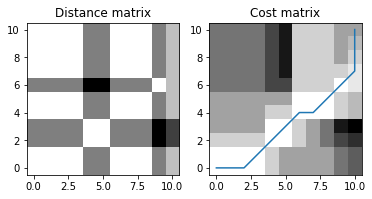

In [132]:
# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))

plt.figure(figsize=(6, 4))
plt.subplot(121)
plt.title("Distance matrix")
plt.imshow(dist_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
plt.subplot(122)
plt.title("Cost matrix")
plt.imshow(cost_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
x_path, y_path = zip(*path)
plt.plot(y_path, x_path)

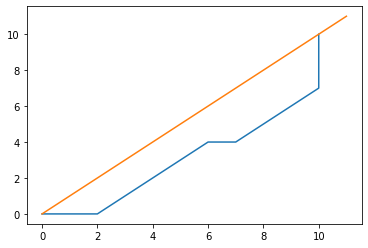

In [134]:
plt.plot(y_path,x_path)
x_true,y_true = zip(*zip(range(N+1),range(M+1)))
plt.plot(y_true,x_true)

In [137]:
path

[(0, 0),
 (0, 1),
 (0, 2),
 (1, 3),
 (2, 4),
 (3, 5),
 (4, 6),
 (4, 7),
 (5, 8),
 (6, 9),
 (7, 10),
 (8, 10),
 (9, 10),
 (10, 10)]

In [118]:
y_true

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)

In [139]:
getAreas(x,y)

(0.47107438016528924, 0.0, 0.47107438016528924)

(12, 12)

In [2]:
points = [(0, 0),
 (0, 1),
 (0, 2),
 (1, 3)]

for i in range(1,len(points)):
    pres = points[i]
    last = points[i-1]
    base_area = 0.5*1 + (i-1)

[(0, 0), (0, 1), (0, 2), (1, 3)]

(-0.5, 10.5, -2.75, 2.75)

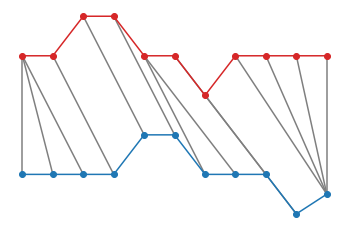

In [136]:
plt.figure()
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c="C7")
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off")

In [7]:
true = pd.Series([i for i in range(30)])/29
predict = true.shift(3).fillna(0)

In [12]:
getAreas(true,predict)

(0.19, 0.0, 0.19)